In [1]:
# !pip install missingno

In [2]:
import math
import torch
# import gpytorch
# import tqdm
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
from time import time
import os


# %matplotlib inline
# %load_ext autoreload
# %autoreload 

In [6]:
def return_data(fold,month,with_scaling, station_id = None):
    train_input = pd.read_csv('AAAI22/data/processed'+'/fold_'+str(fold)+'_train_'+month+'.csv.gz')
    test_input = pd.read_csv('AAAI22/data/processed'+'/fold_'+str(fold)+'_test_'+month+'.csv.gz')
    if station_id != None:
        test_input = test_input[test_input['station_id'] == station_id]
    test_output = np.concatenate((np.array(test_input['PM25_Concentration']).reshape(-1,1), np.array(test_input['CO_Concentration']).reshape(-1,1)), axis=1)
    train_output = np.concatenate((np.array(train_input['PM25_Concentration']).reshape(-1,1), np.array(train_input['CO_Concentration']).reshape(-1,1)), axis=1)
    train_input= train_input.drop(['station_id','PM25_Concentration','CO_Concentration','time','filled'],axis=1)
    try:
        test_input= test_input.drop(['PM25_Concentration','CO_Concentration','station_id','time','filled'],axis=1)
    except:
        test_input= test_input.drop(['station_id','time','filled'],axis=1)
    print(0)
    if with_scaling:
        # scaler_x = StandardScaler()
        # scaler_y = StandardScaler()
        # scaler = MinMaxScaler().fit(train_input)
        # train_input = pd.DataFrame(scaler_x.fit_transform(train_input),columns=list(train_input.columns))
        # train_output = scaler_y.fit_transform(train_output)
        # test_input = pd.DataFrame(scaler_x.transform(test_input),columns=list(test_input.columns))
        # scaler = MinMaxScaler().fit(train_input)
        train_input = torch.tensor(train_input).to(torch.float32)
        test_input = torch.tensor(test_input).to(torch.float32)
        train_output = torch.tensor(train_output).to(torch.float32)
        test_output = torch.tensor(test_output).to(torch.float32)
    return train_input,train_output,test_input,test_output

In [10]:
# for fold in [0]:
#     train_input,train_output,test_input,test_output = return_data(fold=fold,month='mar',with_scaling=True)
#     print("Fold: ",fold)
#     print("Data received")

In [12]:
data =  pd.read_csv('AAAI22/preprocessing/tmp_beijing_aq_plus_met_preprocessed.csv.gz')

<AxesSubplot: >

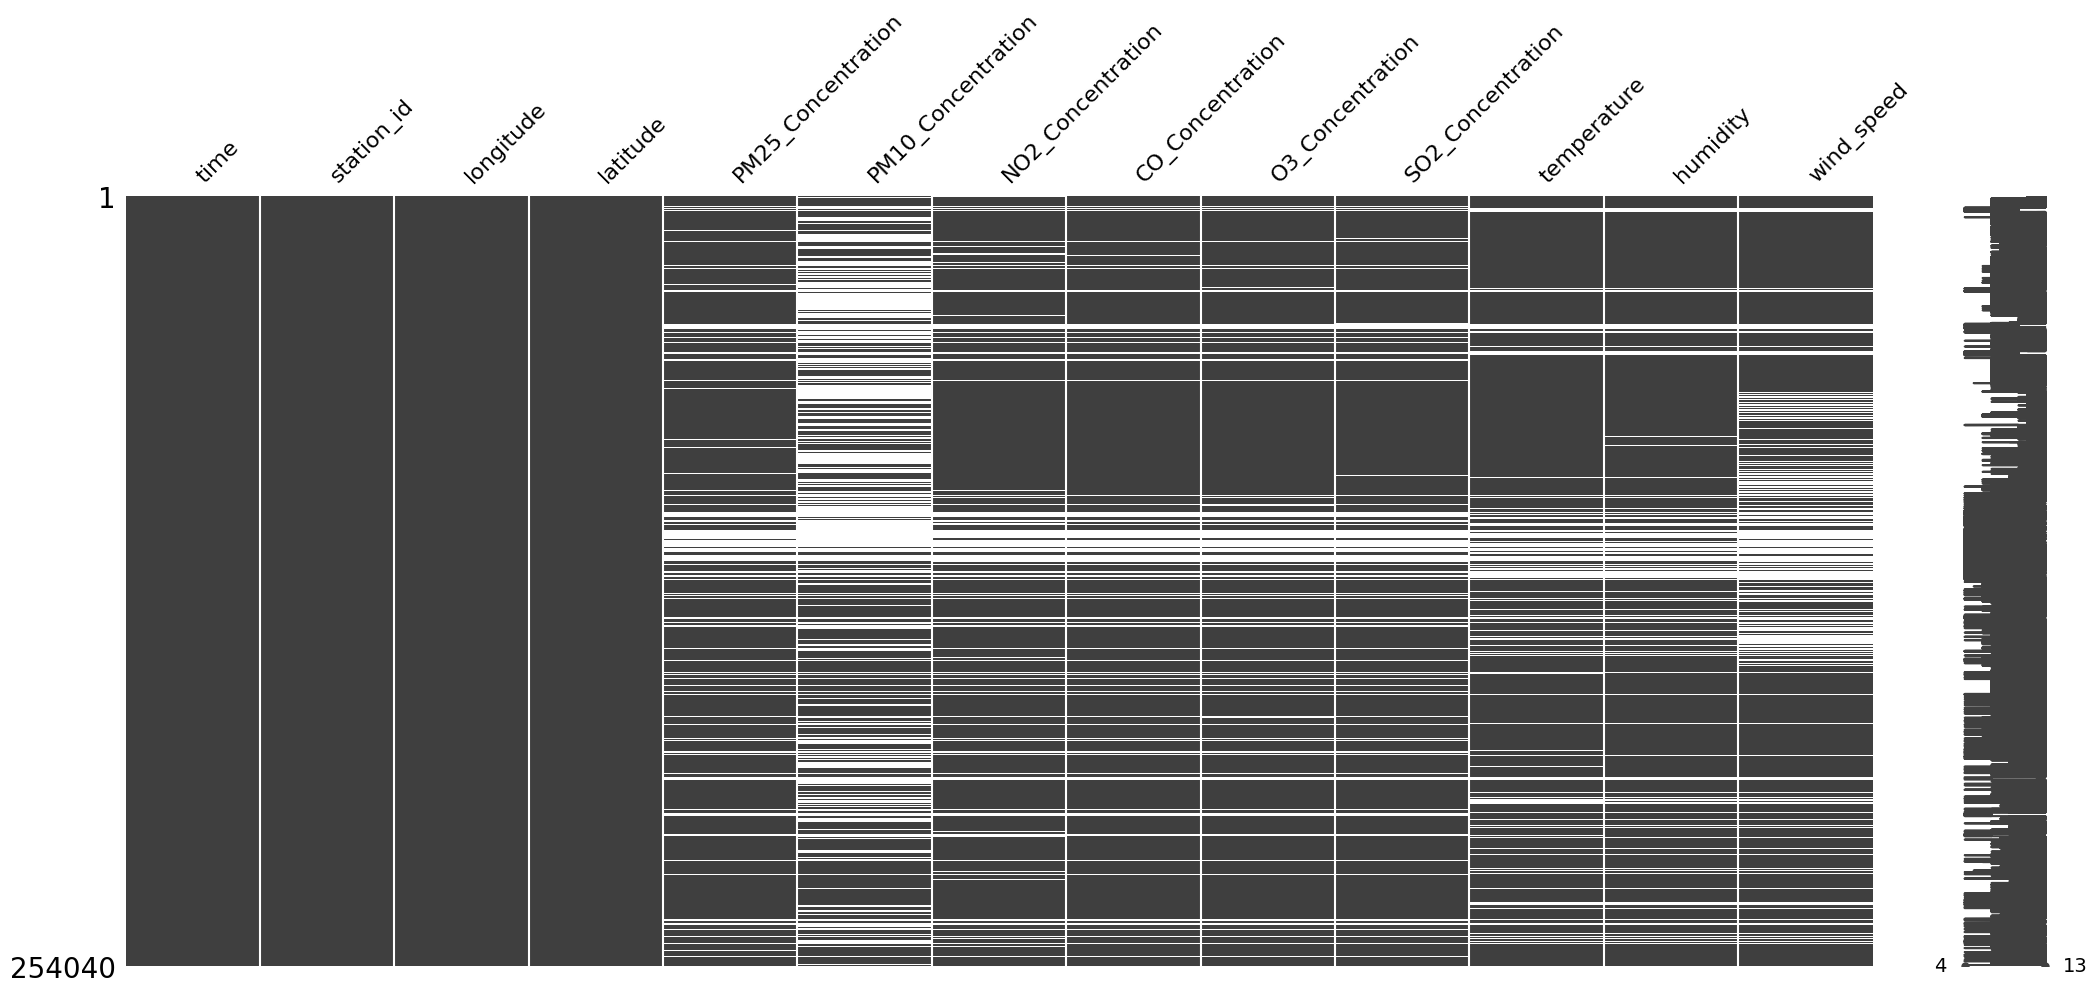

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

<AxesSubplot: >

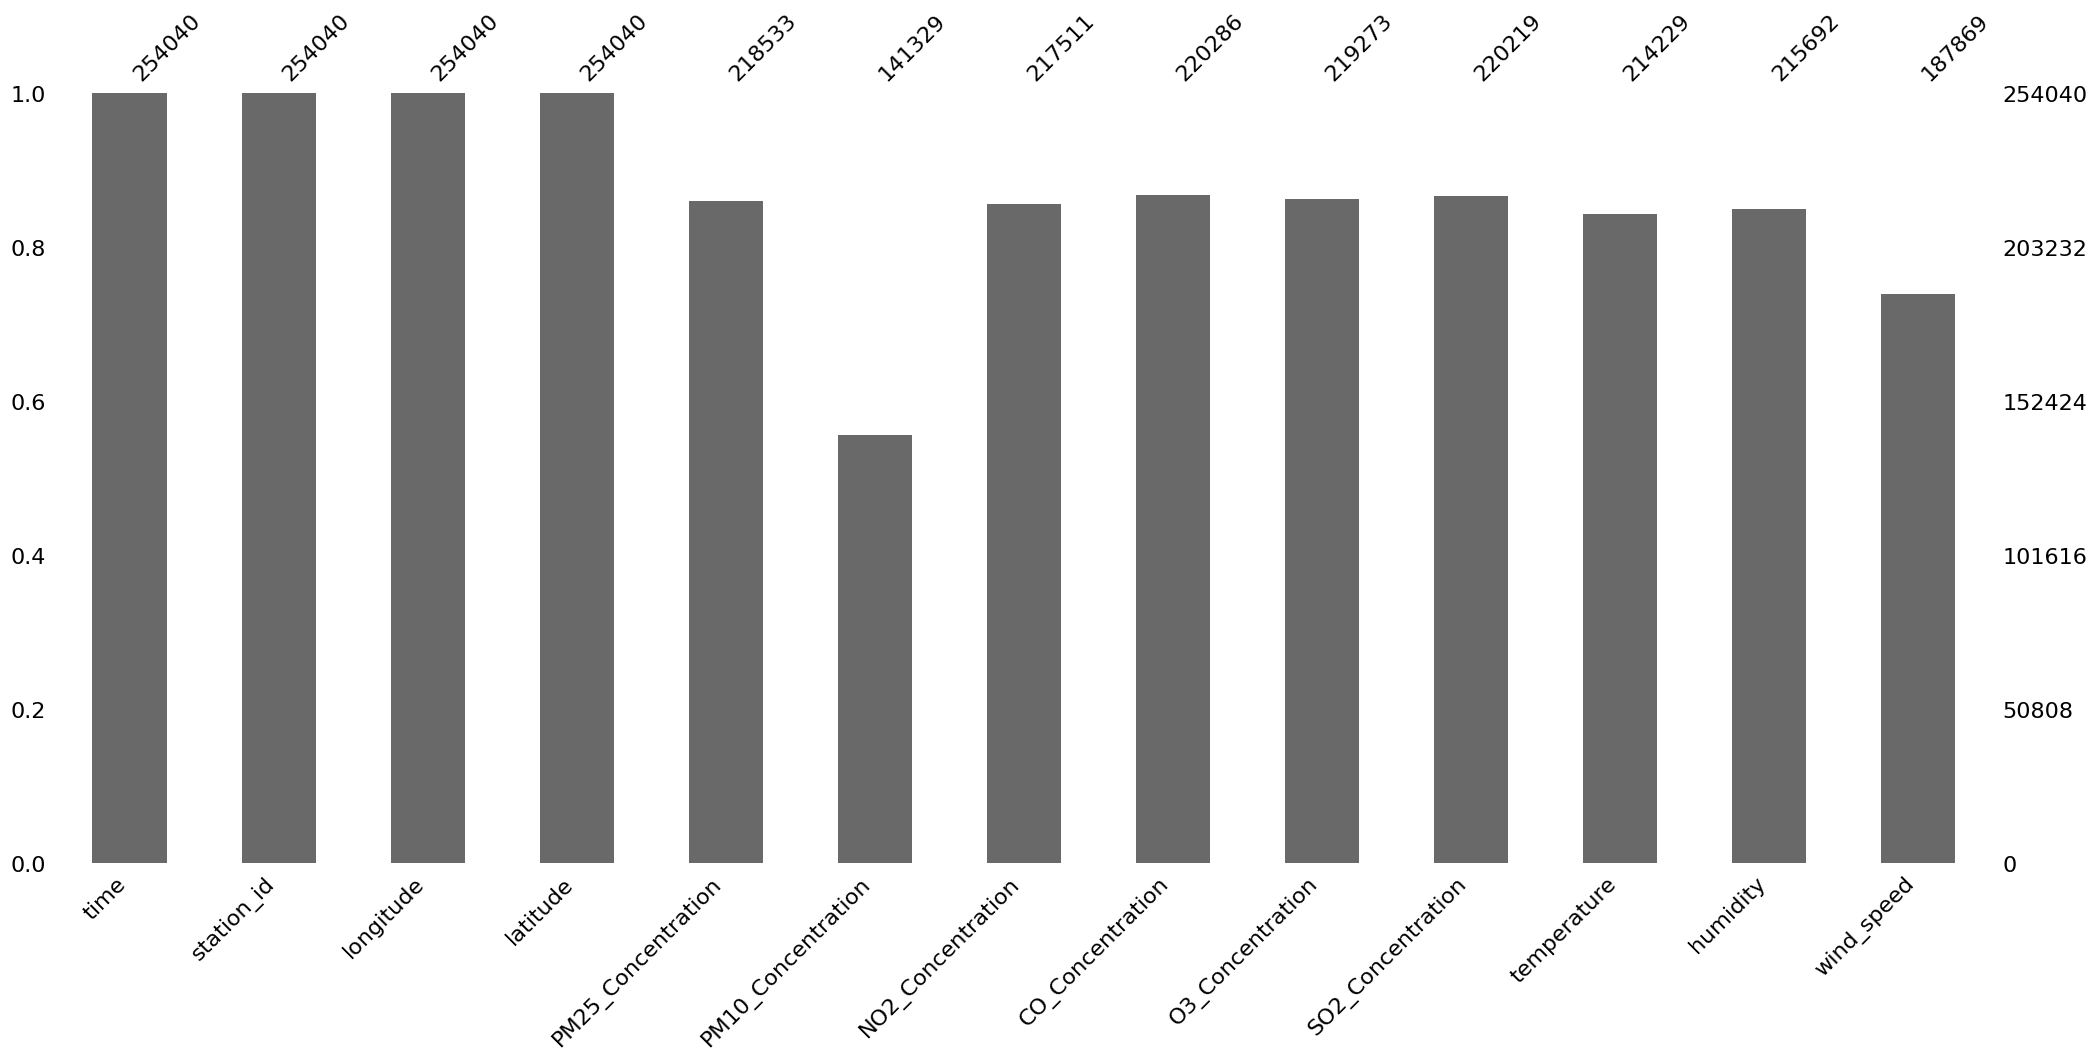

In [14]:
msno.bar(data)

In [8]:
train_input = pd.read_csv('AAAI22/data/processed'+'/fold_'+str(0)+'_train_'+'mar'+'.csv.gz')
test_input = pd.read_csv('AAAI22/data/processed'+'/fold_'+str(0)+'_test_'+'mar'+'.csv.gz')

<AxesSubplot: >

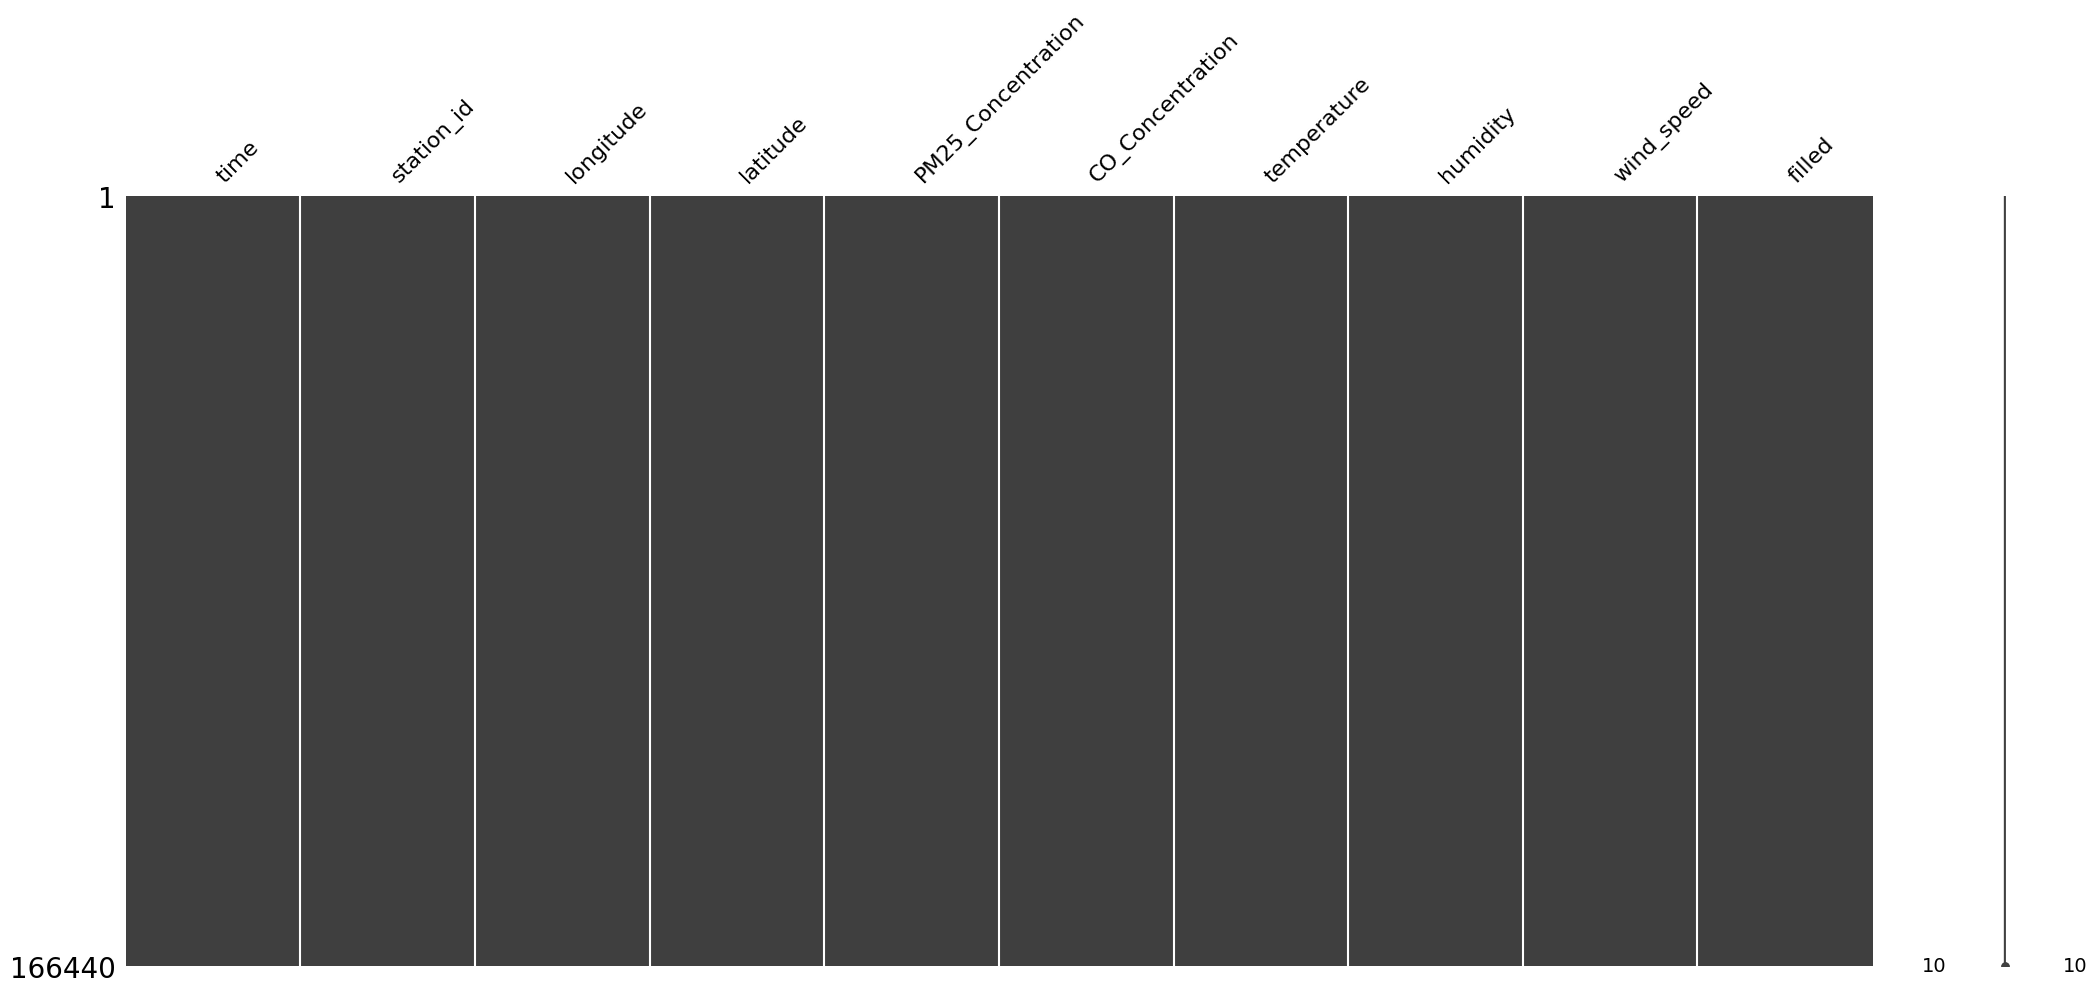

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(train_input)